# Q1. Import required libraries and read the dataset.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
app=pd.read_csv('Apps_data+(1).csv')

# Q2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [5]:
app.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9403,Virtual Mother Surgery Doctor : Emergency Hosp...,FAMILY,3.9,70,61M,"10,000+",Free,0,Teen,Educational,"May 30, 2018",1.1,4.0 and up
9137,quran-DZ,SOCIAL,NaN,0,6.2M,10+,Free,0,Teen,Social,"June 13, 2018",1.1,4.2 and up
10222,Check Your Visitors on FB ?,SOCIAL,3.6,40,1.5M,"5,000+",Free,0,Everyone,Social,"February 17, 2017",4.4,4.2 and up
7700,CP Surprise,LIFESTYLE,3.8,2548,4.9M,"100,000+",Free,0,Everyone,Lifestyle,"January 30, 2018",4.4.2,4.1 and up
7908,Cyprus CU Mobile Banking,FINANCE,3.4,295,Varies with device,"10,000+",Free,0,Everyone,Finance,"February 13, 2018",5.3.4,4.4 and up


In [6]:
app.shape

(10841, 13)

In [7]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### About Dataset:

- Rows count - 10841
- Feature count - 13
- Categorical features - Category,Type,Content rating,Genres,
- Numerical features - Rating,reviews,size,install,price,current version
- There are null values in Rating,Type,Content rating,Current version,Android version

# Q3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [8]:
app.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
app.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


- There is only one numeric type feature
- But there are few features such as size,Reviews,Category,Installs,Price which can be worked upon for building model
- Since they are actually numbers but some garbage value is changing them to object Datatype

# Q4. Check if there are any duplicate records in the dataset? if any drop them.

In [10]:
app.duplicated().sum()

483

In [11]:
app.drop_duplicates(keep='first',inplace=True)

In [12]:
app.duplicated().sum()

0

- There were around 483 duplicate app records in the given Dataset
- We have dropped them  
- It doesn't make sense to have duplicate values since it will not add any value to the model

# Q5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [13]:
list(pd.unique(app['Category']))

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [14]:
app1=app.copy()

In [15]:
app1=app[app['Category']!='1.9']

In [16]:
list(pd.unique(app1['Category']))

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

- There is a category named 1.9 which is a invalid category
- So we drop it out from our Dataset

# Q6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [17]:
app1['Rating'].isnull().sum()

1465

In [18]:
app2=app1.copy()
app2.dropna(subset='Rating',inplace=True)

In [19]:
app2['Rating'].isnull().sum()

0

- We have removed the null values in Rating category

In [20]:
def conversion(x):
    if x > 3.5:
        return 'High'
    else:
        return 'Low'

In [21]:
app2[['Rating_category']]=np.nan

In [22]:
app2['Rating_category']=app2['Rating'].map(conversion)

In [23]:
app2[['Rating','Rating_category']].sample(5)

,Rating,Rating_category
1386,4.6,High
346,4.3,High
1714,4.8,High
10165,4.1,High
1986,4.4,High


- We have used map function to convert ratings to high and low categories

# Q7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


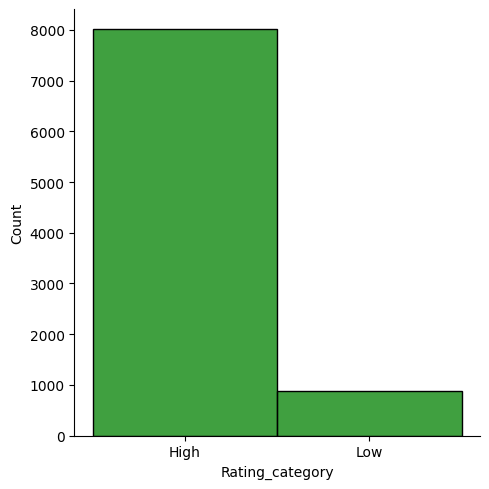

In [24]:
sns.displot(data=app2,x='Rating_category',kind='hist',color='green');

- There are nearly 8000 apps with High ratings(>3.5)
- There are around 1000 apps with low ratings(<3.5)

# Q8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [25]:
app2['Reviews']=app2['Reviews'].astype('int')

In [26]:
app2.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

- Here we have converted the datatype of Reviews column from object to int

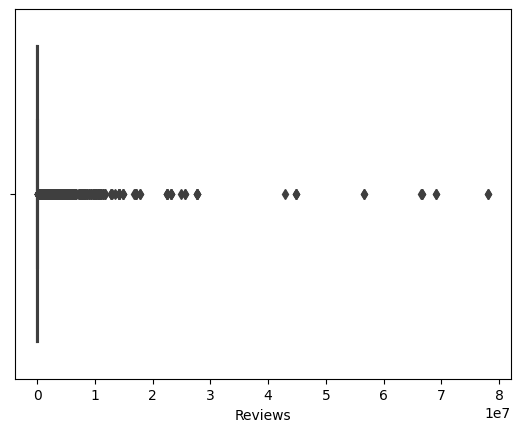

In [27]:
sns.boxplot(data=app2,x='Reviews',);

- There are lot of outliers in the column Reviews
- We need to scale it

In [28]:
log_t=FunctionTransformer(np.log1p)
app2['Reviews']=pd.DataFrame(log_t.fit_transform(app2[['Reviews']]))

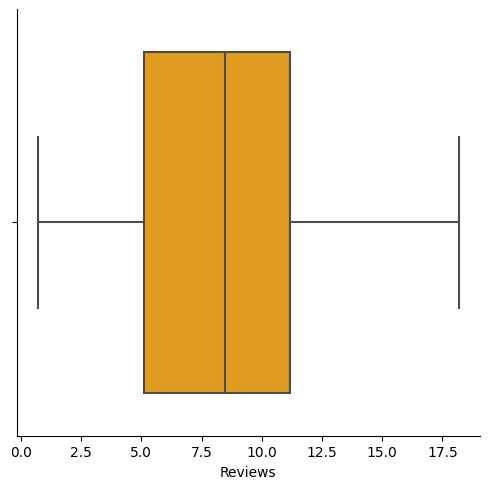

In [29]:
sns.catplot(data=app2,x='Reviews',kind='box',color='orange');

- We have dealt with outliers by using Log transformation
- Since the values are larger we used Log transformation method to scale the data

# Q9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [30]:
app2[['Size']].head()

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M


In [31]:
app2['Size']=app2['Size'].str.replace('k','000')
app2['Size']=app2['Size'].str.replace('M','000000')

In [32]:
app2=app2[app2['Size']!='Varies with device']

In [33]:
app2['Size']=app2['Size'].astype(float)

In [34]:
app2['Size'].dtypes

dtype('float64')

# Q10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [35]:
app2[['Installs']].head()

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"


In [36]:
app2['Installs']=app2['Installs'].str.replace('+','',regex=True)

In [37]:
app2['Installs']=app2['Installs'].str.replace(',','',regex=True)

In [38]:
app2['Installs']=app2['Installs'].astype(int)

In [39]:
app2['Installs'].dtype

dtype('int32')

# Q11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [40]:
app2['Price'].sample(5)

8680    0
1798    0
9618    0
7552    0
6646    0
Name: Price, dtype: object

In [41]:
app2['Price']=app2['Price'].str.replace('$','',regex=True)

In [42]:
app2['Price']=app2['Price'].astype(float)

In [43]:
app2['Price'].dtype

dtype('float64')

# Q12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


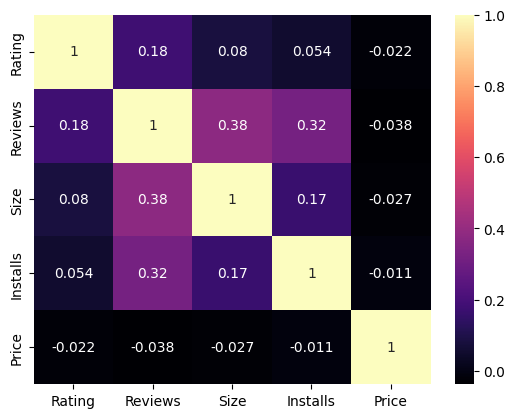

In [44]:
sns.heatmap(data=app2.corr(numeric_only=True),annot=True,cmap='magma');

In [45]:
app2.drop(['Rating','Genres','App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [46]:
app2.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

# Q13. Encode the categorical columns.

In [47]:
app2.dtypes

Category            object
Reviews            float64
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Rating_category     object
dtype: object

- Category,Content Rating,Type,Rating category are categorical columns
- We will encode them 

In [48]:
app2['Category'].nunique()

33

In [49]:
app2['Content Rating'].nunique()

6

- Label encode 'Category' and 'Content Rating' and 'Rating_category' features

In [50]:
le=LabelEncoder()

In [51]:
app2['Category']=le.fit_transform(app2['Category'])

In [52]:
app2['Category'].sample(5)

10016    27
4952     15
10148    32
8805     14
9863     12
Name: Category, dtype: int32

In [53]:
app2['Content Rating']=le.fit_transform(app2['Content Rating'])

In [54]:
app2['Content Rating'].sample(5)

8404     4
10469    1
10372    3
3102     1
1173     1
Name: Content Rating, dtype: int32

In [55]:
app2['Rating_category']=le.fit_transform(app2['Rating_category'])

In [56]:
app2['Rating_category'].sample(5)

1515    0
7688    0
7661    0
3431    0
2117    0
Name: Rating_category, dtype: int32

- We have label encoded the features 'Category' and 'Content Rating' and 'Rating_category'

In [57]:
app2['Type'].nunique()

2

- we shall label encode 'Type' 
- Since it wont add too much columns
- Hence our dataset wont suffer from curse of dimensionality

In [58]:
def to_onehotencode(x):
    return pd.get_dummies(data=x)

In [59]:
app3=pd.concat((app2,to_onehotencode(app2['Type'])),axis=1)

In [60]:
app3.drop('Type',axis=1,inplace=True)

In [61]:
list(app3.columns)

['Category',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Content Rating',
 'Rating_category',
 'Free',
 'Paid']

- We have OneHotEncoded the feature 'Type'
- We have dropped the original 'Type' feature since we have label encoded it
- This will cause Multicollinearity problem

# Q14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [62]:
X = app3.drop('Rating_category',axis=1)

In [63]:
y = app3[['Rating_category']]

In [64]:
X.sample(5)

,Category,Reviews,Size,Installs,Price,Content Rating,Free,Paid
1486,16,4.844187,1.9,10000,0.0,1,1,0
7415,14,10.308653,96000000.0,1000000,0.0,4,1,0
5799,29,2.890372,7.4,5000,0.0,1,1,0
497,7,10.520132,44000000.0,1000000,0.0,3,1,0
8883,26,2.944439,994000.0,1000,0.0,1,1,0


In [65]:
y.sample(5)

,Rating_category
8399,0
7880,0
1806,0
4703,0
2694,0


# Q15. Split the dataset into train and test.

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=900)

In [67]:
len(X_train)

5196

In [68]:
len(X_test)

2228

- We have successfully splitted the dataset into train set and test set
- Test is set to .30 percent of total dataset
- Train is set to 0.70 percent of total dataset

# Q16. Standardize the data, so that the values are within a particular range.

In [69]:
app3.sample(5)

,Category,Reviews,Size,Installs,Price,Content Rating,Rating_category,Free,Paid
6616,11,5.062595,7.0,50000,0.0,1,0,1,0
7242,18,2.484907,6.2,1000,0.0,1,1,1,0
9,0,4.804021,3.1,10000,0.0,1,0,1,0
2326,20,8.243808,16000000.0,100000,0.0,1,0,1,0
1647,18,10.260777,24000000.0,1000000,0.0,1,0,1,0


In [70]:
mms=MinMaxScaler()

In [71]:
X_train=pd.DataFrame(mms.fit_transform(X_train))

In [72]:
X_test=pd.DataFrame(mms.transform(X_test))

- We have Normalized the dataset 
- Now the range of values lie within a particular range
- Range of values in dataset is: 0 and 1